In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [4]:
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=[object])


X_df = numerical.drop("total_claim_amount", axis = 1)

X = X_df
y = df["total_claim_amount"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

X_train.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,8551.000000,8551.000000,8551.000000,8551.00000,8551.000000,8551.000000,8551.000000
mean,7994.902701,51817.509063,93.295287,15.13554,48.192960,0.375395,2.983511
std,6848.846659,24717.379264,34.575537,10.13316,27.849503,0.899706,2.398456
min,1898.000000,10074.000000,61.000000,0.00000,0.000000,0.000000,1.000000
25%,4020.500000,29435.000000,68.000000,6.00000,25.000000,0.000000,1.000000
50%,5764.000000,50446.000000,83.000000,14.00000,48.000000,0.000000,2.000000
75%,8964.000000,72194.500000,109.000000,23.00000,71.000000,0.000000,4.000000
max,74228.000000,99981.000000,298.000000,35.00000,99.000000,5.000000,9.000000


In [6]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()

# This method iterates through the columns and removes columns with variance lower than the threshhold (0 default)
selector = VarianceThreshold() # Default threshold value is 0 - threshold is the value we set to determine if a column should be dropped
# A variance of 0 is no variance, would mean a straight line (all same values) not helpful so should be dropped 
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

Initial number of numerical columns:  (8551, 7)

Final number of numerical columns:  (8551, 7)



,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,21423,22379,65,9,31,0,2
1,8391,40211,106,5,98,2,6
2,3969,49544,101,3,29,0,1
3,14914,45963,63,3,73,2,2
4,18060,57882,115,1,61,0,2
...,...,...,...,...,...,...,...
8546,7610,98701,94,22,66,0,3
8547,35186,86134,98,17,78,0,2
8548,4241,19834,64,26,8,4,8
8549,12941,77060,106,23,90,0,2


['monthly_premium_auto', 'total_claim_amount']


/var/folders/lc/ls4b0x3n1_10xq8rchr9cl480000gn/T/ipykernel_48359/1475021251.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = abs(df.corr())


,monthly_premium_auto,total_claim_amount
0,61,292
1,64,744
2,100,480
3,97,484
4,117,707
...,...,...
10684,253,1214
10685,65,273
10686,201,381
10687,158,618


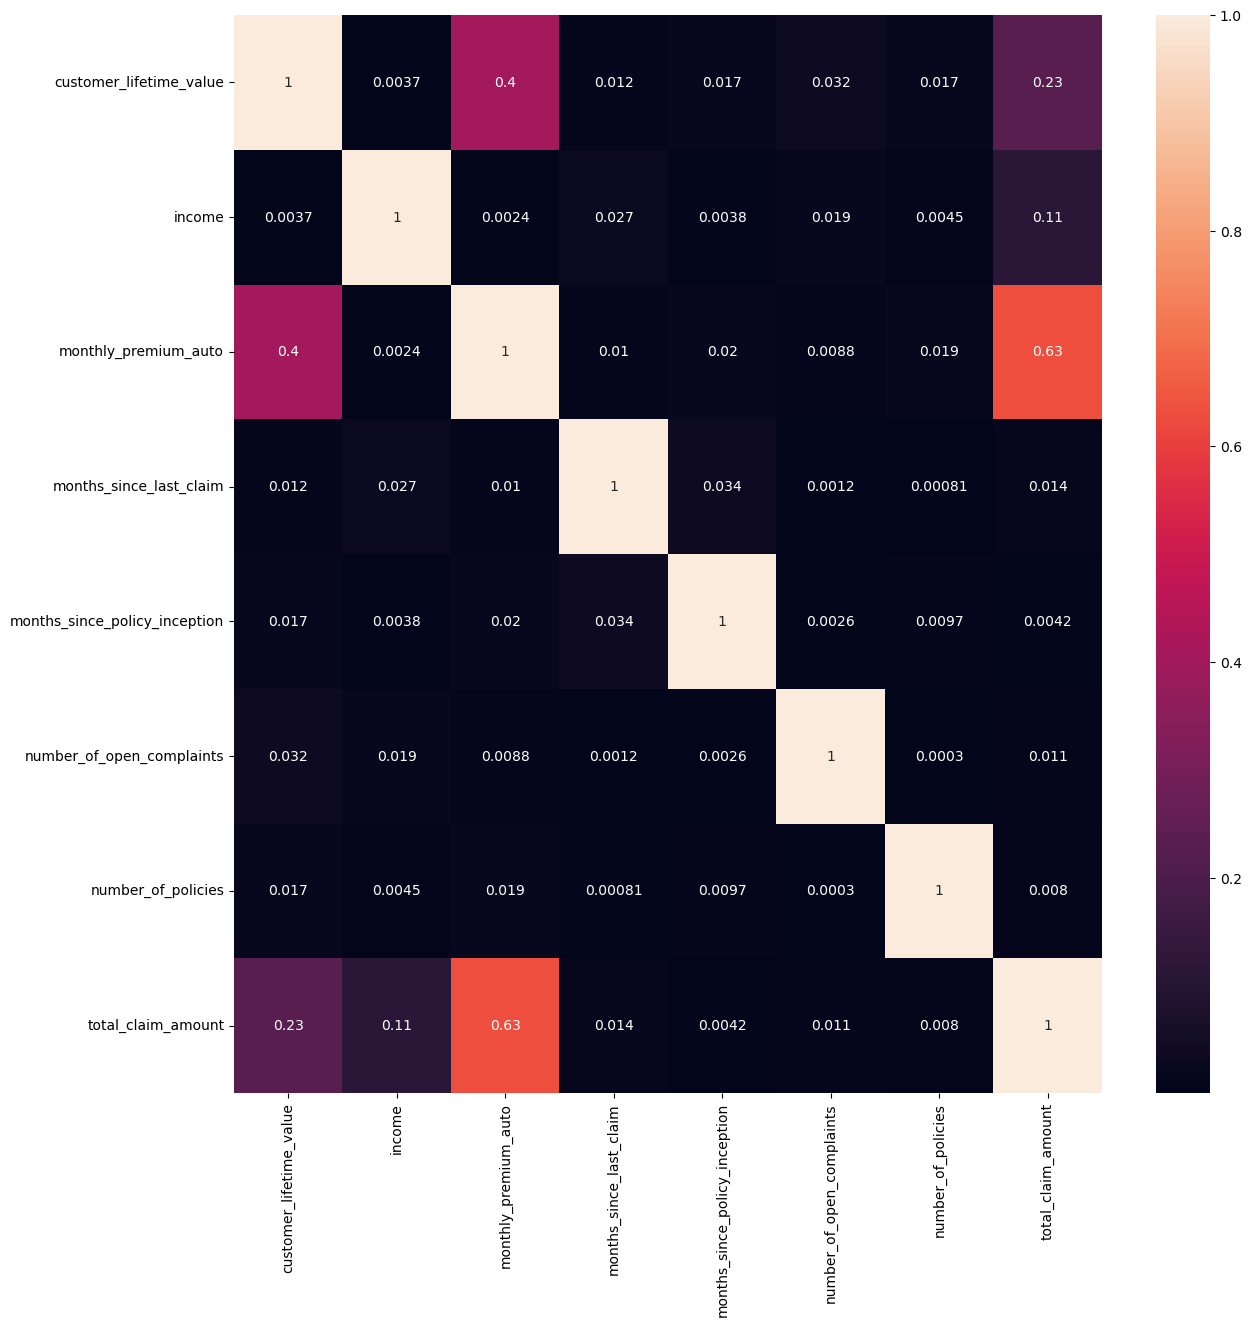

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(df.corr())
#c

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(c, annot=True);

#c['total_claim_amount']
c_last = c['total_claim_amount'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
#nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
#nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
#cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

#X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
#X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)
#features are columns

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Final selected features: 


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,21423,22379,65,9,31,0,2
1,8391,40211,106,5,98,2,6
2,3969,49544,101,3,29,0,1
3,14914,45963,63,3,73,2,2
4,18060,57882,115,1,61,0,2
...,...,...,...,...,...,...,...
8546,7610,98701,94,22,66,0,3
8547,35186,86134,98,17,78,0,2
8548,4241,19834,64,26,8,4,8
8549,12941,77060,106,23,90,0,2


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)
X_test = imp_mean.fit_transform(X_test)

In [11]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.4086926440650056, Test -> 0.41140062170554137


In [12]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.4086926440650055, Test -> 0.4114006217055418


/var/folders/lc/ls4b0x3n1_10xq8rchr9cl480000gn/T/ipykernel_48359/679042463.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/mariaamaral/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/mariaamaral/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e+08, tolerance: 6.469e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mo

In [13]:
model=Ridge(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.4086926440650055, Test -> 0.4114006217055418


In [14]:
model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.40869238511331907, Test -> 0.4114386909519817


In [15]:
def train_test_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

models = [LinearRegression(), Lasso(alpha=0), Ridge(alpha=0), ElasticNet(alpha=0.1)]
train_test_models(models, X_train, y_train, X_test, y_test)


LinearRegression: Train -> 0.4086926440650056, Test -> 0.41140062170554137
Lasso: Train -> 0.4086926440650055, Test -> 0.4114006217055418
Ridge: Train -> 0.4086926440650055, Test -> 0.4114006217055418
ElasticNet: Train -> 0.40869238511331907, Test -> 0.4114386909519817


/var/folders/lc/ls4b0x3n1_10xq8rchr9cl480000gn/T/ipykernel_48359/2366448298.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/mariaamaral/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/mariaamaral/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e+08, tolerance: 6.469e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m